In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from math import sin, sqrt, pi

## Two non-interacting particles

This code and these plots explore Hinchliffe Section 12.6, pages 181 to 184. In this Section, the author explores the concepts of particle indistinguishability, symmetric, and antisymmetric wavefunctions. I recommend you read the text for a complete treatment of these concepts. However, I cover the essentials here.

We can write a wavefunction and total energy for two non-interacting particles in a one-dimensional box as:

$$ \psi_{n_A,n_B}(x_A, x_B) = \frac{2}{L} \sin\Bigl(\frac{n_A \pi x_A}{L}\Bigr) \sin\Bigl(\frac{n_B \pi x_B}{L}\Bigr) $$

$$ E_{n_A,n_B} = (n_{A}^2+n_{B}^2) \frac{h^2}{8mL^2} $$

$$ n_A, n_B = 1, 2, 3,\dots $$

$$ 0 < x_A < L $$

$$ 0 < x_B < L $$

Since these are two separate particles, we can suppose they have a different quantum number and create the following (naive) probability density expression:

$$ (\psi_{n_A, n_B})^2 = \Biggl(\frac{2}{L} \sin\Bigl(\frac{n_A \pi x_A}{L}\Bigr) \sin\Bigl(\frac{n_B \pi x_B}{L}\Bigr)\Biggr)^2 $$

However, the problem with this equation is that it treats the particles as distinguishable, and this assumption violates our requirements of indistinguishable particles.

We need a wavefunction that yields the same probability density regardless of which particle is at what energy level, which preserves the indistinguishability requirement. We achieve this by adding or subtracting two wavefunctions. Adding gives us a symmetric wavefunction; subtracting gives us an antisymmetric wavefunction. Symmetric total wavefunctions maintain their sign if we swap the underlying individual wavefunctions. On the other hand, antisymmetric wavefunctions change their sign when we switch the underlying individual wavefunctions. This gives us two more equations, each with an appropriate normalization constant.

Symmetric:

$$ \psi_s(x_A, x_B) = \sqrt\frac{1}{2} \bigl(\psi_{1,2}(x_A, x_B) + \psi_{2,1}(x_A, x_B)\bigr) $$

Antisymmetric:

$$ \psi_a(x_A, x_B) = \sqrt\frac{1}{2} \bigl(\psi_{1,2}(x_A, x_B) - \psi_{2,1}(x_A, x_B)\bigr) $$

In [5]:
class TwoNonInteractingInABox:
    def __init__(self, mass, length):
        self.mass = mass
        self.length = length
    
    def wavefunction(self, na, nb, xa, xb):
        return 2 / self.length * sin(na * pi * xa / self.length) * sin(nb * pi * xb / self.length)
    
    def symmetric(self, na, nb, xa, xb):
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) + self.wavefunction(nb, na, xa, xb))
    
    def antisymmetric(self, na, nb, xa, xb):
        return sqrt(0.5) * (self.wavefunction(na, nb, xa, xb) - self.wavefunction(nb, na, xa, xb))
    
    def sq_wavefunction(self, na, nb):
        points = 100
        xas = np.linspace(0.0, self.length, points)
        xbs = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ixa, xa in enumerate(xas):
            for ixb, xb in enumerate(xbs):
                zs[ixa, ixb] = self.antisymmetric(na, nb, xa, xb) ** 2
        return xas, xbs, zs

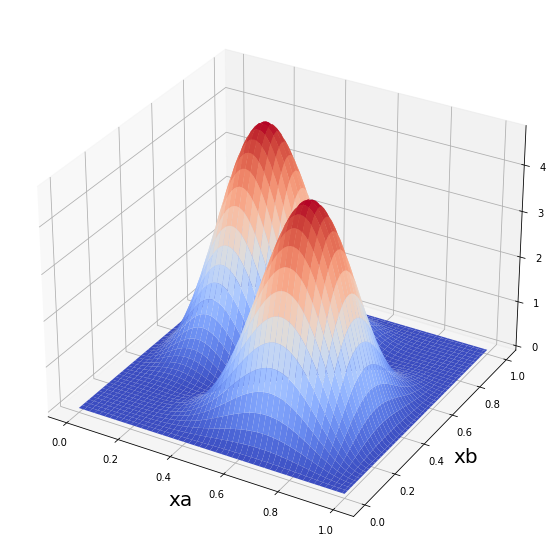

In [18]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), subplot_kw={"projection": "3d"})
xas, xbs, zs = box.sq_wavefunction(na=1, nb=2)
xs, ys = np.meshgrid(xas, xbs)
ax[0].set_xlabel('xa', size=20)
ax[0].set_ylabel('xb', size=20)
ax[0].plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=True)

<a list of 15 text.Text objects>

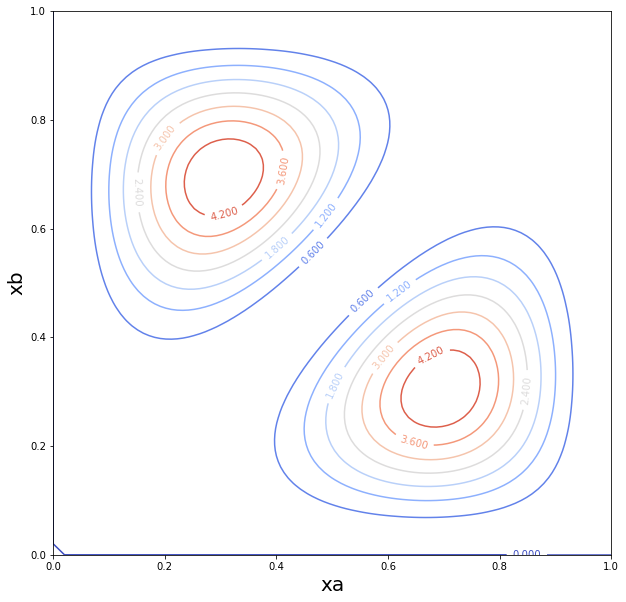

In [22]:
box = TwoNonInteractingInABox(mass=1.0, length=1.0)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
xas, xbs, zs = box.sq_wavefunction(na=1, nb=2)
xs, ys = np.meshgrid(xas, xbs)
ax.set_xlabel('xa', size=20)
ax.set_ylabel('xb', size=20)
cs = ax.contour(ys, xs, zs, cmap=cm.coolwarm, antialiased=True)
ax.clabel(cs, inline=True, fontsize=10)